# Osnovne statistike

*Osnovne statistike o podatkih o živalih iz zavetišča Horjul.*

In [224]:
import numpy as np
from csv import DictReader
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

## Tip živali

In [225]:
# mačke : psi
zivali = DictReader(open('zivali.csv', 'rt', encoding='utf-8'))
st_psi = 0
st_macke = 0
for row in zivali:
    if row['tip'] == "pes":
        st_psi += 1
    elif row['tip'] == "muc":
        st_macke += 1
        
print(f"število mačk: %d, število psov: %d" %(st_macke, st_psi))

število mačk: 222, število psov: 404


In [226]:
zivali = DictReader(open('zivali.csv', 'rt', encoding='utf-8'))
psi = [int(row["cas_v_zavetiscu"]) for row in zivali if row['tip'] == "pes" and row["cas_v_zavetiscu"] != 'x' and int(row["cas_v_zavetiscu"]) >= 0]
psi.sort(reverse=True)
zivali = DictReader(open('zivali.csv', 'rt', encoding='utf-8'))
macke = [int(row["cas_v_zavetiscu"]) for row in zivali if row['tip'] == "muc" and row["cas_v_zavetiscu"] != 'x' and int(row["cas_v_zavetiscu"]) >= 0]
macke.sort(reverse=True)

### Mačke

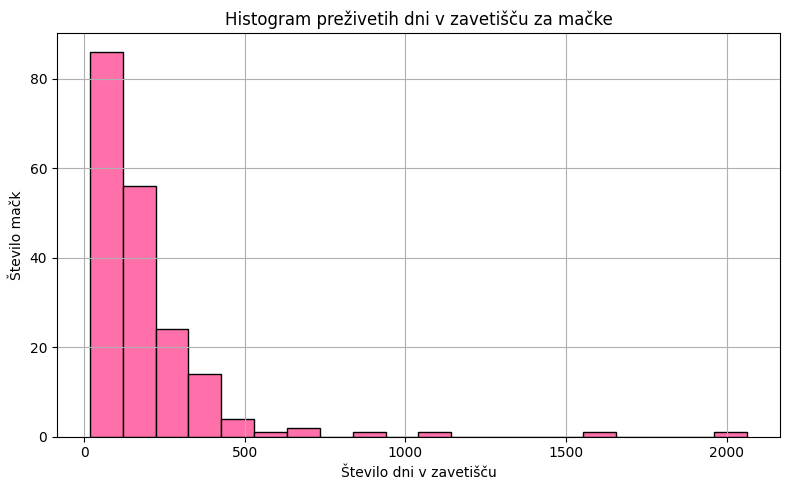

In [227]:
# histogram
plt.figure(figsize=(8, 5))
plt.hist(macke, bins=20, color='#FF70AB', edgecolor='black')
plt.xlabel('Število dni v zavetišču')
plt.ylabel('Število mačk')
plt.title('Histogram preživetih dni v zavetišču za mačke')
plt.grid(True)
plt.tight_layout()
plt.show()

### Psi

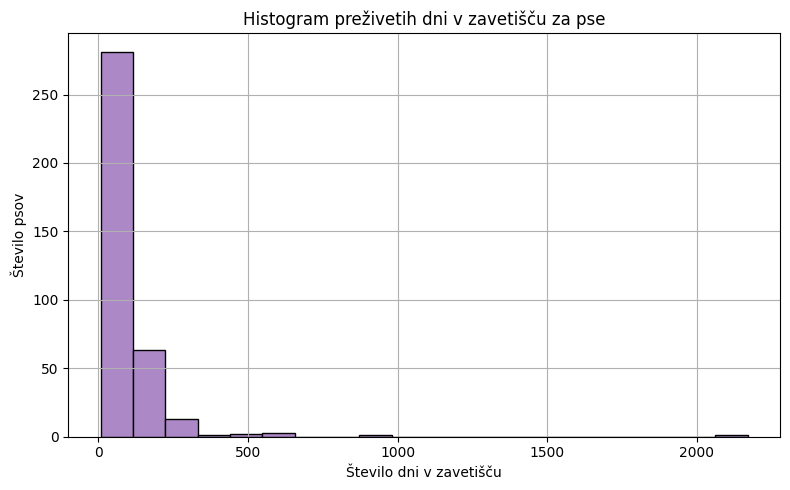

In [228]:
plt.figure(figsize=(8, 5))
plt.hist(psi, bins=20, color='#AD88C6', edgecolor='black')
plt.xlabel('Število dni v zavetišču')
plt.ylabel('Število psov')
plt.title('Histogram preživetih dni v zavetišču za pse')
plt.grid(True)
plt.tight_layout()
plt.show()

In [229]:
print(f"Povprečno število dni preživetih v zavetiču\nMačke: %d\nPsi: %d" %(np.mean(macke), np.mean(psi)))

Povprečno število dni preživetih v zavetiču
Mačke: 186
Psi: 93


## Število dni preživetih v zavetišču za posamezno žival

In [230]:
skupno = macke + psi
skupno.sort(reverse=True)

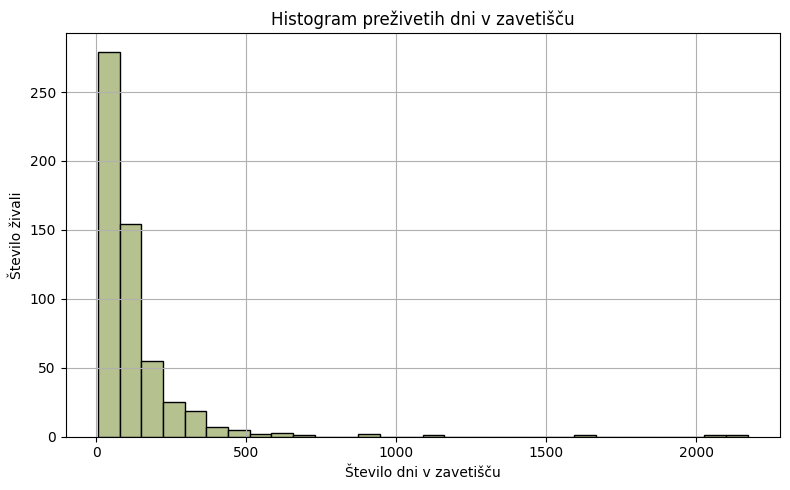

Povprečno število dni preživetih v zavetiču: 125
Najmanjše število dni preživetih v zavetišču: 7
Največje število dni preživetih v zavetišču: 2170


In [231]:
#narišem histogram
plt.figure(figsize=(8, 5))
plt.hist(skupno, bins=30, color='#B5C18E', edgecolor='black')
plt.xlabel('Število dni v zavetišču')
plt.ylabel('Število živali')
plt.title('Histogram preživetih dni v zavetišču')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Povprečno število dni preživetih v zavetiču: %d" %(np.mean(skupno)))
print(f"Najmanjše število dni preživetih v zavetišču: %d" %(np.min(skupno)))
print(f"Največje število dni preživetih v zavetišču: %d" %(np.max(skupno)))

## Porazdelitve

Ali porazdelitev spominja na katero od znanih porazdelitev? 

C:\Users\nk46668\lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\nk46668\lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


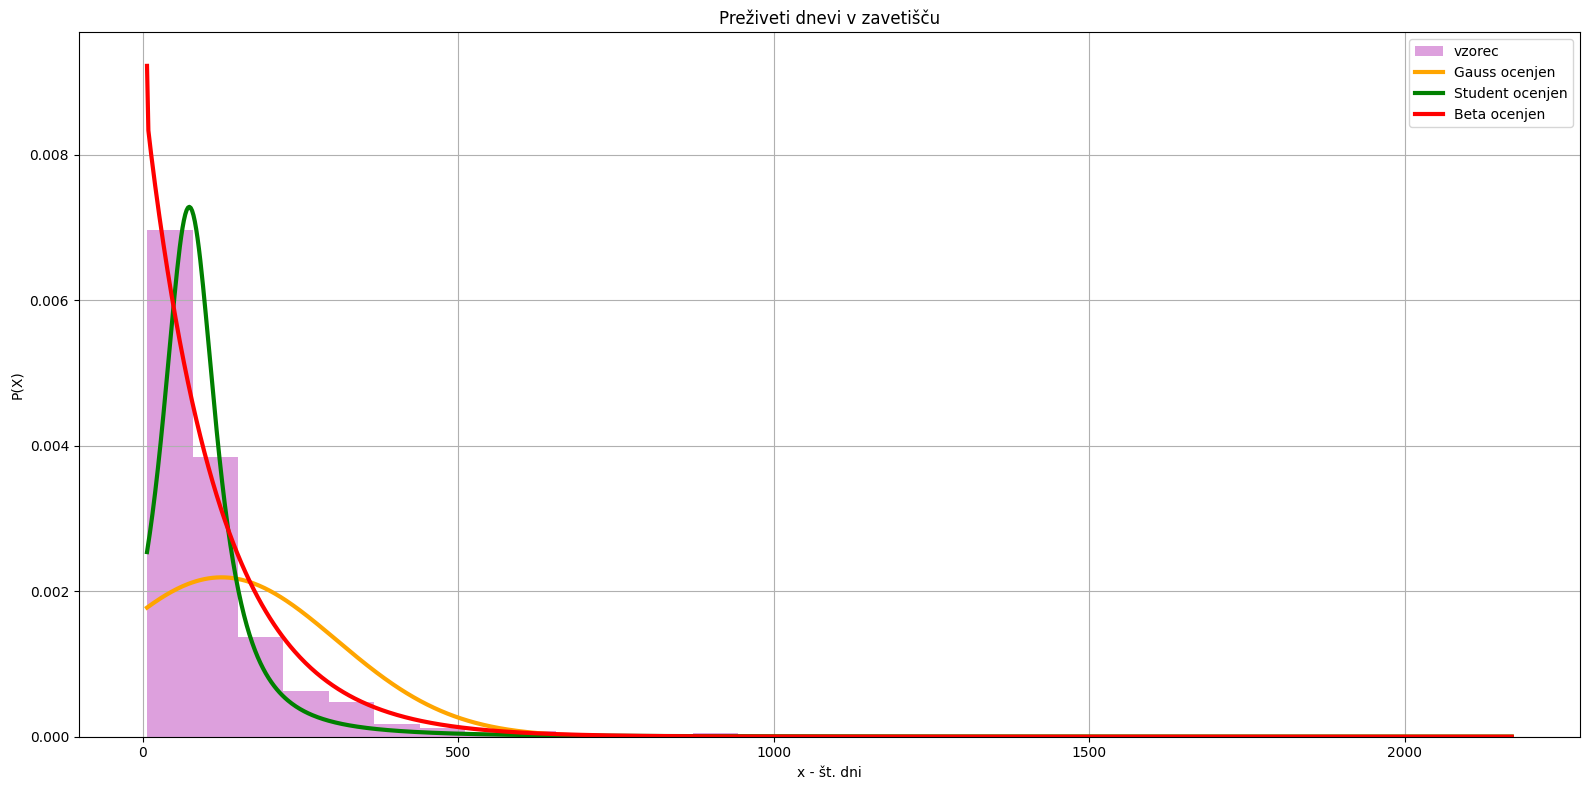

In [232]:
from scipy.stats import *
from scipy.stats import multivariate_normal as mvn

n = len(skupno)
mu = np.mean(skupno)
s2 = (n-1)/n * np.var(skupno)
plt.figure(figsize=(16, 8))
counts, bins, _ = plt.hist(skupno, density=True, label="vzorec", bins=30, color="plum")

#gauss
xr = np.linspace(min(bins), max(bins), 1000)
pdf = [mvn.pdf(x, mu, s2) for x in xr] 
plt.plot(xr, pdf, "-", label="Gauss ocenjen", linewidth=3.0, color="orange")

#student
pars = t.fit(skupno)
pdf_student = [t.pdf(x, *pars) for x in xr ]
plt.plot(xr, pdf_student, "-", label="Student ocenjen", linewidth=3.0, color="green")

#beta
pars = beta.fit(skupno)
pdf_beta = [beta.pdf(x, *pars) for x in xr ]
plt.plot(xr, pdf_beta, "-", label="Beta ocenjen", linewidth=3.0, color="red")

plt.xlabel('x - št. dni')
plt.ylabel('P(X)')
plt.title('Preživeti dnevi v zavetišču')
plt.grid(True)
plt.tight_layout()
plt.legend(loc=1);
plt.show()

Porazdelitev števila dni preživetih v zavetišču se najbolj prilagaja Studentovi porazdelitvi.

## Datum sprejema

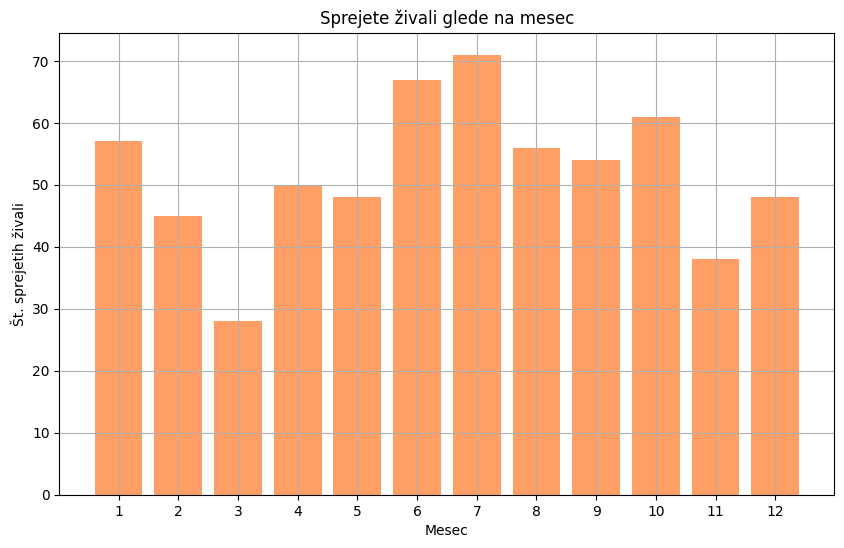

In [233]:
from datetime import datetime
zivali = DictReader(open('zivali.csv', 'rt', encoding='utf-8'))
months = dict()
for row in zivali: 
    date_string = row["datum_sprejema"]
    if date_string and date_string != 'x':
        date_object = datetime.strptime(date_string, "%d/%m/%Y")
        month = date_object.month
        if month in months:
            months[month] += 1
        else:
            months[month] = 1

sortedmonths= sorted(months.items(), key=lambda x: x[0], reverse=False)
months_list = [mesec for mesec, count in sortedmonths]
counts_list = [count for mesec, count in sortedmonths]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(months_list, counts_list, color='#FF9F66')
plt.xlabel('Mesec')
plt.ylabel('Št. sprejetih živali')
plt.title('Sprejete živali glede na mesec')
plt.xticks(months_list)  # Set x-axis ticks to be the months
plt.grid(True)
plt.show()

## Datum oddaje

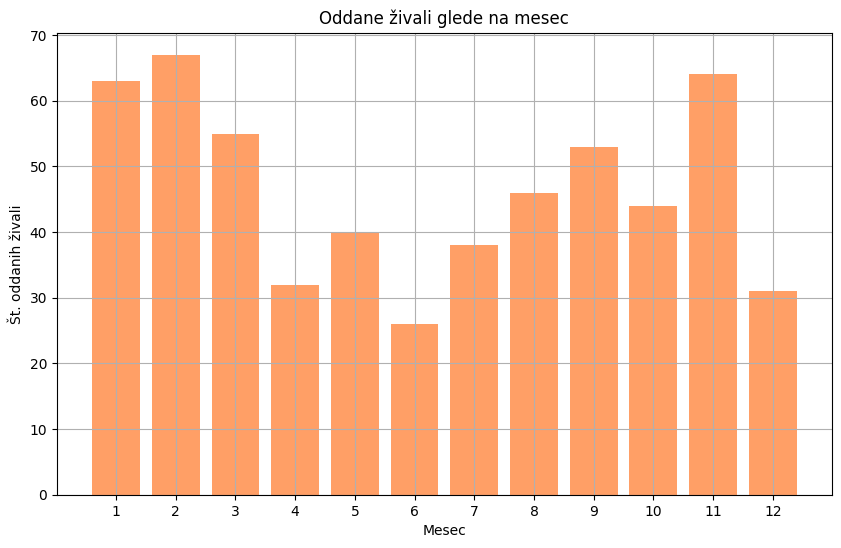

In [234]:
zivali = DictReader(open('zivali.csv', 'rt', encoding='utf-8'))
months = dict()
dates = dict()
for row in zivali: 
    date_string = row["datum_oddaje"]
    if date_string and date_string != 'x':
        date_object = datetime.strptime(date_string, "%d/%m/%Y")
        month = date_object.month
        year = date_object.year
        if month in months:
            months[month] += 1
        else:
            months[month] = 1
        if year != 2014 and year != 2015:
            date = (month, year)
            if date in dates:
                dates[date] += 1
            else:
                dates[date] = 1
                
sortedmonths= sorted(months.items(), key=lambda x: x[0], reverse=False)
months_list = [mesec for mesec, count in sortedmonths]
counts_list = [count for mesec, count in sortedmonths]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(months_list, counts_list, color='#FF9F66')
plt.xlabel('Mesec')
plt.ylabel('Št. oddanih živali')
plt.title('Oddane živali glede na mesec')
plt.xticks(months_list)  # Set x-axis ticks to be the months
plt.grid(True)
plt.show()

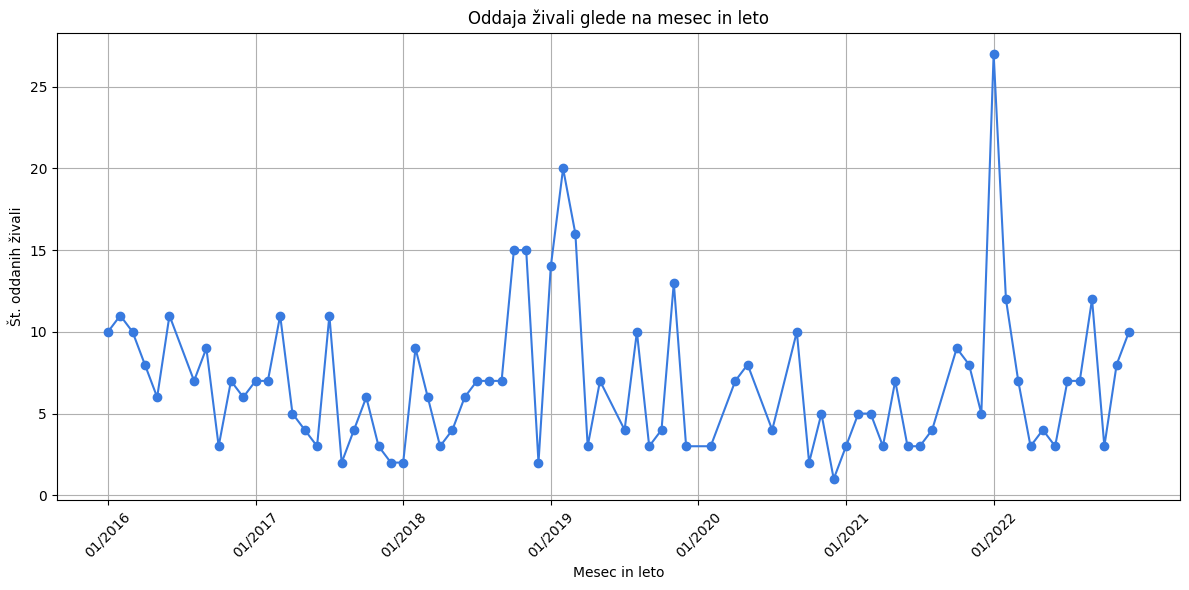

In [235]:
# oddaja - mesec + leto

sorted_dates = sorted(dates.items(), key=lambda x: (x[0][1], x[0][0]))
dates_list = [date for date, count in sorted_dates]
counts_list = [count for date, count in sorted_dates]

# numerical value za vsako mesec/leto kombinacijo
unique_years = sorted(set(year for _, year in dates_list))
numerical_dates = []

for year in unique_years:
    months_for_year = [month for month, yr in dates_list if yr == year]
    months_for_year_sorted = sorted(set(months_for_year))
    for month in months_for_year_sorted:
        numerical_dates.append(month + (year - unique_years[0]) * 12)

plt.figure(figsize=(12, 6))
plt.plot(numerical_dates, counts_list, marker='o', color='#387ADF')

# x-axis za januar vsakega leta
january_dates = [month + (year - unique_years[0]) * 12 for year in unique_years for month in [1]]
plt.xticks(january_dates, [f"01/{year}" for year in unique_years], rotation=45)

plt.xlabel('Mesec in leto')
plt.ylabel('Št. oddanih živali')
plt.title('Oddaja živali glede na mesec in leto')
plt.grid(True)
plt.tight_layout()
plt.show()

## Veterinska oskrba živali v zavetišču

In [236]:
from csv import DictReader
oskrba_zivali = DictReader(open('veterinarska_oskrba.csv', 'rt', encoding='utf-8'))

In [237]:
oskrba = dict()
for row in oskrba_zivali:
    # id_zivali = row["id"] ne zanima
    kastriran = int(row["sterilizirana_kastrirana"])
    cepljen = int(row["cepljena"])
    cipiran = int(row["cipirana"])
    parametri = (kastriran, cepljen, cipiran) #tuple npr. (1, 1, 1) -> celotna oskrba
    if parametri not in oskrba:
        oskrba[parametri] = 0
    oskrba[parametri] += 1
sortedOskrba = sorted(oskrba.items(), key=lambda x: x[1], reverse=True) #da ni nametan

In [238]:
labels = []
for parametri, n in sortedOskrba:
    #samo za izpis
    kastriran = "SO kastrirane/sterilizirane" if parametri[0] == 1 else "NISO kastirane/sterilizirane"
    cepljen = "SO cepljene" if parametri[1] == 1 else "NISO cepljene"
    cipiran = "SO čipirane" if parametri[2] == 1 else "NISO čipirane"
    print(f'Število živali, ki {kastriran}, {cepljen}, {cipiran}: {n}.')
    
    #za labels v grafu
    kastriran = "kastrirane/sterilizirane" if parametri[0] == 1 else ""
    cepljen = "cepljene" if parametri[1] == 1 else ""
    cipiran = "čipirane" if parametri[2] == 1 else ""
    if kastriran == "" and cepljen == "" and cipiran == "":
        parms = "brez oskrbe"
    else:
        parms = f"{kastriran} {cepljen} {cipiran}"
    labels.append((parms, n))

Število živali, ki SO kastrirane/sterilizirane, SO cepljene, SO čipirane: 518.
Število živali, ki NISO kastirane/sterilizirane, NISO cepljene, NISO čipirane: 80.
Število živali, ki NISO kastirane/sterilizirane, SO cepljene, SO čipirane: 12.
Število živali, ki SO kastrirane/sterilizirane, NISO cepljene, SO čipirane: 10.
Število živali, ki SO kastrirane/sterilizirane, SO cepljene, NISO čipirane: 5.
Število živali, ki SO kastrirane/sterilizirane, NISO cepljene, NISO čipirane: 1.


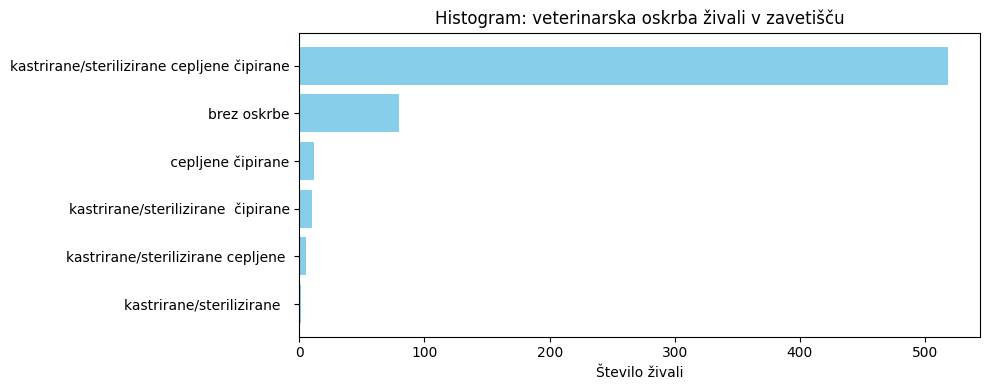

In [239]:
kategorije = [str(parametri) for parametri, _ in labels][::-1]
koliko = [n for _, n in labels][::-1]

plt.figure(figsize=(10, 4))
plt.barh(kategorije, koliko, color='skyblue')
plt.xlabel('Število živali')
plt.title('Histogram: veterinarska oskrba živali v zavetišču')
plt.tight_layout()
plt.show()

In [240]:
labels = {"Polna oskrba": 0, "Delna oskrba": 0, "Brez oskrbe": 0}

for parametri, n in sortedOskrba:
    #za labels v grafu
    if parametri[0] == 1 and parametri[1] == 1 and parametri[2] == 1:
        parms = "Polna oskrba"
    elif parametri[0] == 0 and parametri[1] == 0 and parametri[2] == 0:
        parms = "Brez oskrbe"
    else:
        parms = "Delna oskrba"
    labels[parms] += n
    #izpis

print(labels)

{'Polna oskrba': 518, 'Delna oskrba': 28, 'Brez oskrbe': 80}


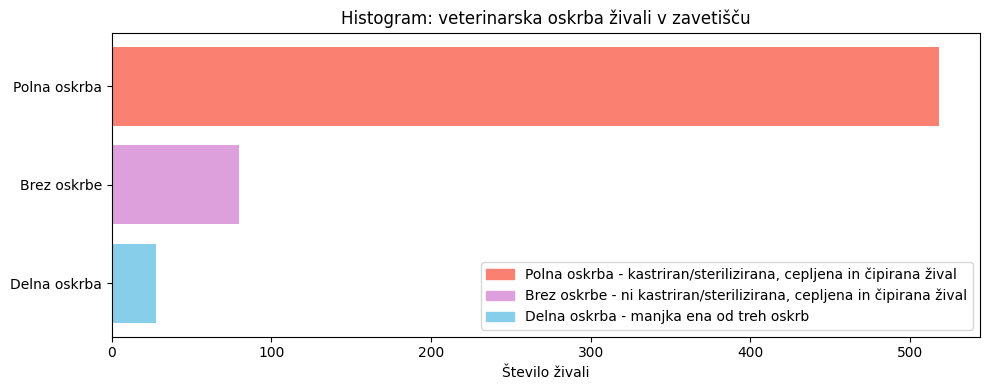

In [241]:
import matplotlib.patches as mpatches

sortedLabels = sorted(labels.items(), key=lambda x: x[1], reverse=True) # uredi
kategorije = [parametri for parametri, _ in sortedLabels][::-1]
koliko = [n for _, n in sortedLabels][::-1]
colors = ['skyblue', 'plum', 'salmon']

plt.figure(figsize=(10, 4))
bars = plt.barh(kategorije, koliko, color=colors)
plt.xlabel('Število živali')
plt.title('Histogram: veterinarska oskrba živali v zavetišču')
plt.tight_layout()

# Legend
legend_labels = ['Polna oskrba - kastriran/sterilizirana, cepljena in čipirana žival',
                 'Brez oskrbe - ni kastriran/sterilizirana, cepljena in čipirana žival',
                 'Delna oskrba - manjka ena od treh oskrb',
                ]
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors[::-1], legend_labels)]
plt.legend(handles=legend_patches, loc='lower right')
plt.show()
